In [57]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from plotnine import *
from sklearn.metrics import accuracy_score

In [58]:
from sklearn.model_selection import train_test_split
X = np.load('regressor_data/X.npy')
Y = np.load('regressor_data/Y.npy')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state = 123456)
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}, Y_test shape: {Y_test.shape}")

X_train shape: (318, 986), X_test shape: (106, 986)
Y_train shape: (318,), Y_test shape: (106,)


# Create Random Forest Regressor

In [59]:
rf = RandomForestRegressor(n_estimators = 100, oob_score=True, random_state=123456)
rf.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=123456, verbose=0, warm_start=False)

In [60]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr

rf_predicted_train = rf.predict(X_train)
rf_predicted_test = rf.predict(X_test)
test_score = r2_score(Y_test, rf_predicted_test)
spearman = spearmanr(Y_test, rf_predicted_test)
pearson = pearsonr(Y_test, rf_predicted_test)

print(f'Out-of-bag R-2 score estimate: {rf.oob_score_:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Out-of-bag R-2 score estimate: 0.504
Test data R-2 score: 0.416
Test data Spearman correlation: 0.636
Test data Pearson correlation: 0.659


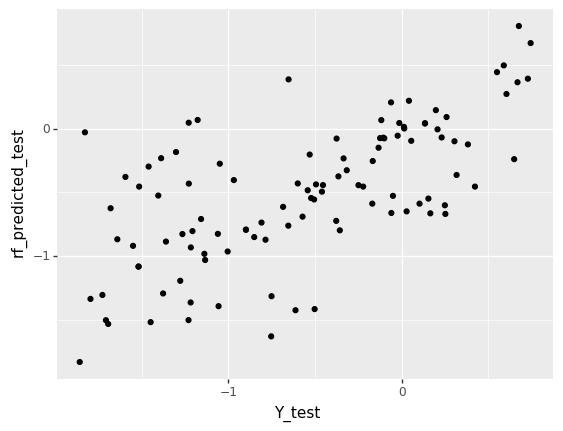

<ggplot: (8753903000745)>

In [61]:
(
    ggplot(pd.DataFrame(Y_test, rf_predicted_test)) +
    geom_point(aes(x='Y_test', y='rf_predicted_test'))
)

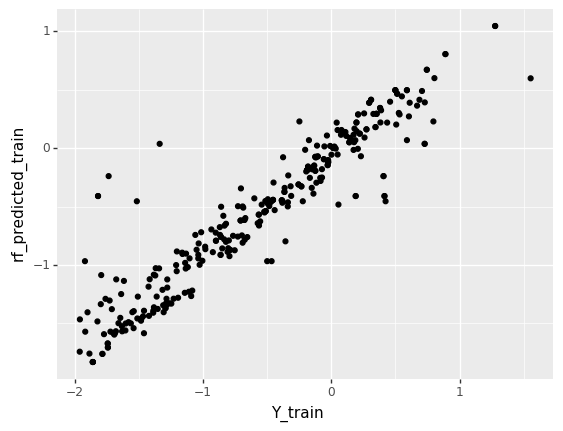

<ggplot: (8753903453033)>

In [62]:
(
    ggplot(pd.DataFrame(Y_train, rf_predicted_train)) +
    geom_point(aes(x='Y_train', y='rf_predicted_train'))
)

# Create MLP Regressor

In [71]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(10, 5), random_state=1)
mlp.fit(X_train, Y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(10, 5), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [73]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr

mlp_predicted_train = mlp.predict(X_train)
mlp_predicted_test = mlp.predict(X_test)
test_score = r2_score(Y_test, mlp_predicted_test)
spearman = spearmanr(Y_test, mlp_predicted_test)
pearson = pearsonr(Y_test, mlp_predicted_test)

print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Test data R-2 score: 0.384
Test data Spearman correlation: 0.638
Test data Pearson correlation: 0.671


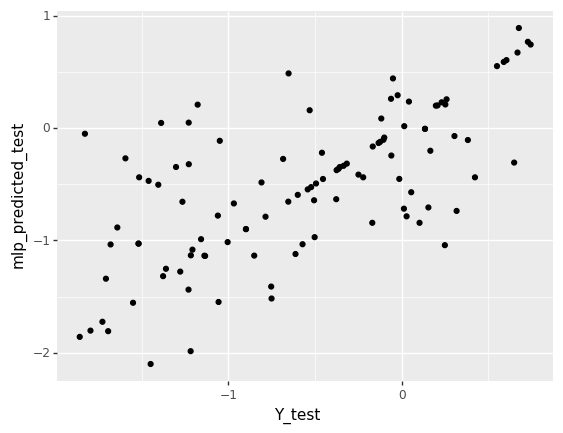

<ggplot: (8753904323125)>

In [74]:
(
    ggplot(pd.DataFrame(Y_test, mlp_predicted_test)) +
    geom_point(aes(x='Y_test', y='mlp_predicted_test'))
)

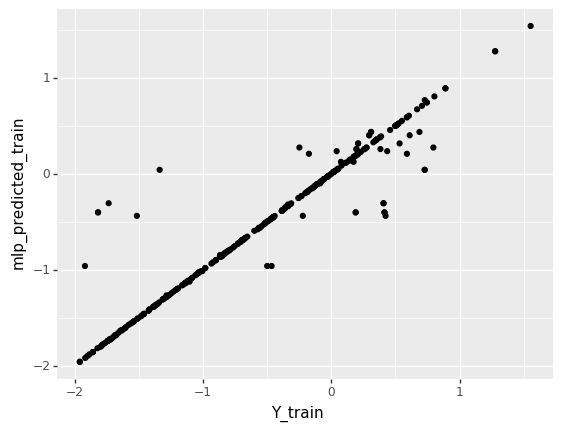

<ggplot: (8753904282117)>

In [75]:
(
    ggplot(pd.DataFrame(Y_train, mlp_predicted_train)) +
    geom_point(aes(x='Y_train', y='mlp_predicted_train'))
)